In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

In [34]:
df = pd.read_csv('apple_quality.csv')
data = df.drop(index = 4000)
le = LabelEncoder()
data['Quality'] =le.fit_transform(data['Quality'])
scaler = MinMaxScaler()
df = scaler.fit_transform(data)
df = pd.DataFrame(df,columns=data.columns)
del df['A_id']

In [35]:
X = df.drop('Quality',axis=1)
y = df["Quality"]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

In [62]:
model_3 = MLPClassifier(activation='tanh',
                       random_state=18,
                       hidden_layer_sizes=(8,16,16),
                       alpha=0.001,
                       batch_size=128,
                       solver='adam',
                       verbose=True,
                       max_iter=800,
                       n_iter_no_change=300,
                       learning_rate_init=0.05,
                       momentum=0.9)
model_3.fit(X_train,y_train)
y_pred_test = model_3.predict(X_test)
y_pred_train = model_3.predict(X_train)
f1_test = f1_score(y_test,y_pred_test)

Iteration 1, loss = 0.67642888
Iteration 2, loss = 0.56237532
Iteration 3, loss = 0.53350463
Iteration 4, loss = 0.51437434
Iteration 5, loss = 0.51037797
Iteration 6, loss = 0.48707663
Iteration 7, loss = 0.44635820
Iteration 8, loss = 0.45877940
Iteration 9, loss = 0.41496808
Iteration 10, loss = 0.40921307
Iteration 11, loss = 0.45734315
Iteration 12, loss = 0.41349203
Iteration 13, loss = 0.39178955
Iteration 14, loss = 0.38563259
Iteration 15, loss = 0.40397997
Iteration 16, loss = 0.39153918
Iteration 17, loss = 0.38325149
Iteration 18, loss = 0.38403932
Iteration 19, loss = 0.38471464
Iteration 20, loss = 0.40194344
Iteration 21, loss = 0.38578002
Iteration 22, loss = 0.33883155
Iteration 23, loss = 0.34404338
Iteration 24, loss = 0.40249971
Iteration 25, loss = 0.36311349
Iteration 26, loss = 0.32710780
Iteration 27, loss = 0.32596556
Iteration 28, loss = 0.31601678
Iteration 29, loss = 0.33203509
Iteration 30, loss = 0.32164578
Iteration 31, loss = 0.31365418
Iteration 32, los

c:\Users\beach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


f1_test: 0.9504232164449818,  f1_train  : 0.9699812382739212


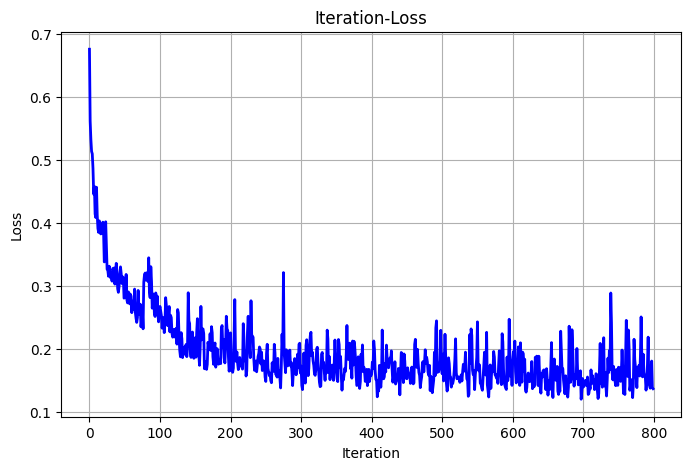

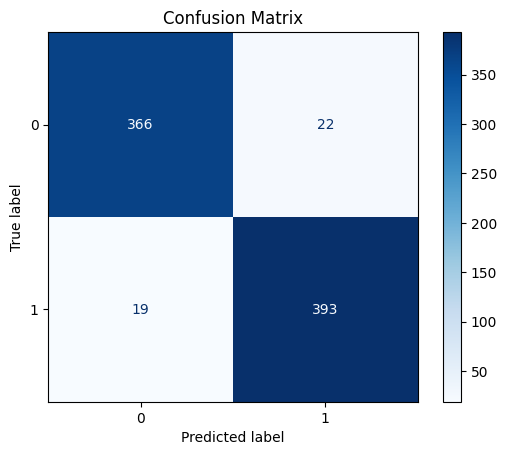

In [64]:

f1_train = f1_score(y_train,y_pred_train)
cm = confusion_matrix(y_test,y_pred_test)
print(f'f1_test: {f1_test},  f1_train  : {f1_train}')
plt.figure(figsize=(8,5))
plt.plot(model_3.loss_curve_, color='b', linewidth=2)
plt.title('Iteration-Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()